In [272]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
mpl.rcParams["lines.marker"] = "o"
mpl.rcParams["lines.markersize"] = 6
mpl.rcParams["lines.linestyle"] = "None"


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [273]:

def output(N, z = 1/7):
    L = 100
    alpha = 0.5 
    return z*L**(alpha)*N**(1-alpha)
def birth_rate(C , N):
    return C/(2*N)
def death_rate(C , N):
    return 0.1-(C/(5*N))


N0 = 50
C0 = output(N0)
Ct = [C0]
Nt = [N0]
Ct_Nt = [(C0/N0)]
L = 100
for k in range(17):
    N_after = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
    C_after = output(N_after)
    Ct_Nt.append((C_after/N_after))
    Nt.append(N_after)
    Ct.append(C_after)

    # Correct f-string formatting
    print(f"t: {k}, C_{k} : {Ct[k]:.2f}, N_{k}: {Nt[k]:.2f}, Ct/Nt , {Ct_Nt[k]:.4f}, Birth:{Nt[k]*birth_rate(Ct[k], Nt[k]):.3f}, Death :{Nt[k]*death_rate(Ct[k], Nt[k]):.3f} ,   Nt+1 : {N_after:.2f}, L/Nt+1 : {L/N_after:.2f}" )

t: 0, C_0 : 10.10, N_0: 50.00, Ct/Nt , 0.2020, Birth:5.051, Death :2.980 ,   Nt+1 : 52.07, L/Nt+1 : 1.92
t: 1, C_1 : 10.31, N_1: 52.07, Ct/Nt , 0.1980, Birth:5.154, Death :3.145 ,   Nt+1 : 54.08, L/Nt+1 : 1.85
t: 2, C_2 : 10.51, N_2: 54.08, Ct/Nt , 0.1943, Birth:5.253, Death :3.307 ,   Nt+1 : 56.03, L/Nt+1 : 1.78
t: 3, C_3 : 10.69, N_3: 56.03, Ct/Nt , 0.1909, Birth:5.346, Death :3.464 ,   Nt+1 : 57.91, L/Nt+1 : 1.73
t: 4, C_4 : 10.87, N_4: 57.91, Ct/Nt , 0.1877, Birth:5.436, Death :3.617 ,   Nt+1 : 59.73, L/Nt+1 : 1.67
t: 5, C_5 : 11.04, N_5: 59.73, Ct/Nt , 0.1848, Birth:5.520, Death :3.765 ,   Nt+1 : 61.48, L/Nt+1 : 1.63
t: 6, C_6 : 11.20, N_6: 61.48, Ct/Nt , 0.1822, Birth:5.601, Death :3.908 ,   Nt+1 : 63.18, L/Nt+1 : 1.58
t: 7, C_7 : 11.35, N_7: 63.18, Ct/Nt , 0.1797, Birth:5.677, Death :4.047 ,   Nt+1 : 64.81, L/Nt+1 : 1.54
t: 8, C_8 : 11.50, N_8: 64.81, Ct/Nt , 0.1775, Birth:5.750, Death :4.181 ,   Nt+1 : 66.38, L/Nt+1 : 1.51
t: 9, C_9 : 11.64, N_9: 66.38, Ct/Nt , 0.1753, Birth:5.

In [274]:
Nt = np.zeros(151)
Ct = np.zeros(151)
Ct_Nt = np.zeros(151)
Nt[0] = 50
Ct[0] = output(Nt[0])
Ct_Nt[0] = Ct[0]/Nt[0]
for k in range(150):
    if k <= 79:
        Nt[k+1] = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
        Ct[k+1] = output(Nt[k+1])
        Ct_Nt[k+1] = Ct[k+1]/Nt[k+1]
    else:
        Nt[k+1] = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
        Ct[k+1] = output(Nt[k+1],z = 5)
        Ct_Nt[k+1] = Ct[k+1]/Nt[k+1]

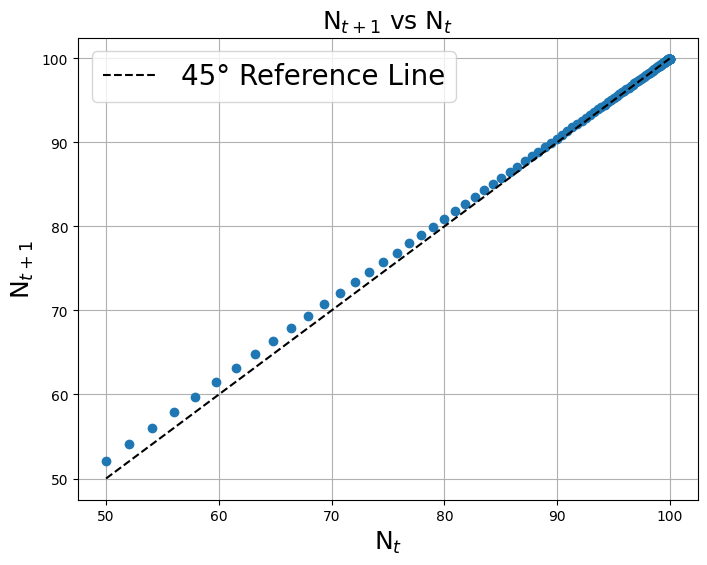

In [275]:
cmap=mpl.colormaps['tab20c']
plt.figure(figsize=(8, 6))

for k in range(150):

    Nt[k+1] = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
    Ct[k+1] = output(Nt[k+1])
    Ct_Nt[k+1] = Ct[k+1]/Nt[k+1]

# Create a scatter plot using a colormap. Here we use the index of each point to assign colors.
# You can also assign colors based on other quantities if desired.

plt.plot(Nt[0:150], Nt[1:151], 'o')

# Add a 45° reference line (y = x)
x = np.linspace(Nt[0],Nt[150],151)
y = x
plt.plot(x,y, 'k--', label='45° Reference Line')

plt.xlabel(r'$\mathrm{N}_t$', fontsize = 18)
plt.ylabel(r'$\mathrm{N}_{t+1}$', fontsize = 18)
plt.title(r'$\mathrm{N}_{t+1}$ vs $\mathrm{N}_{t}$', fontsize = 18)
plt.legend(fontsize = 20)
plt.grid(True)

# Optionally, add a colorbar if you want to visualize the colormap scale
savefig('1(b).pdf', format = 'pdf')

plt.show()


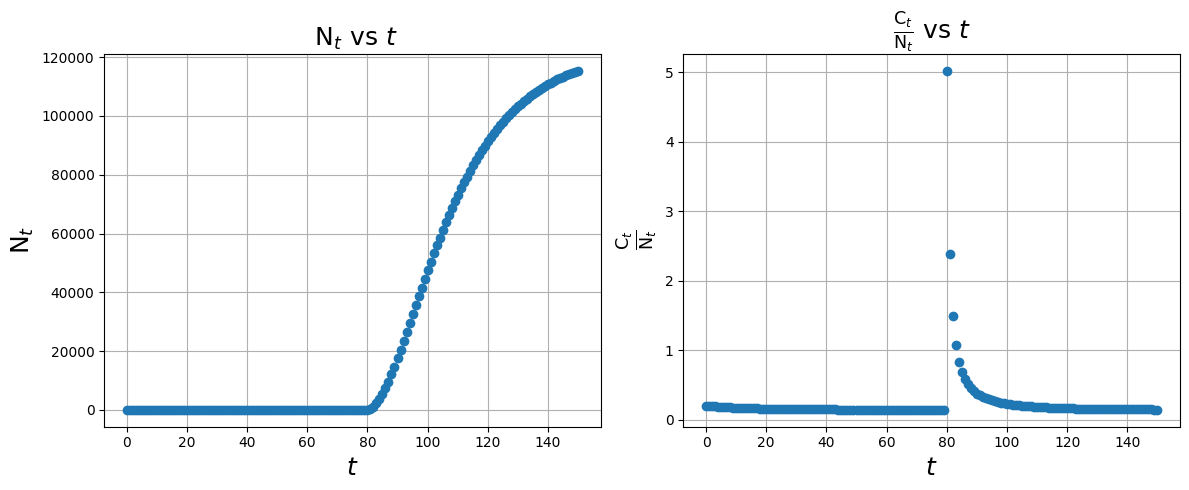

In [276]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))
# Create a scatter plot using a colormap. Here we use the index of each point to assign colors.
# You can also assign colors based on other quantities if desired.
Nt = np.zeros(151)
Ct = np.zeros(151)
Ct_Nt = np.zeros(151)
Nt[0] = 50
Ct[0] = output(Nt[0])
Ct_Nt[0] = Ct[0]/Nt[0]
for k in range(150):
    if k < 79:
        Nt[k+1] = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
        Ct[k+1] = output(Nt[k+1])
        Ct_Nt[k+1] = Ct[k+1]/Nt[k+1]
    else:
        Nt[k+1] = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
        Ct[k+1] = output(Nt[k+1],z = 5)
        Ct_Nt[k+1] = Ct[k+1]/Nt[k+1]
axs[0].plot(np.linspace(0,150,151),Nt, 'o')
# Add a 45° reference line (y = x)


axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{N}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{N}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),Ct_Nt , 'o')
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18)
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale

plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('1(d).pdf', format = 'pdf')


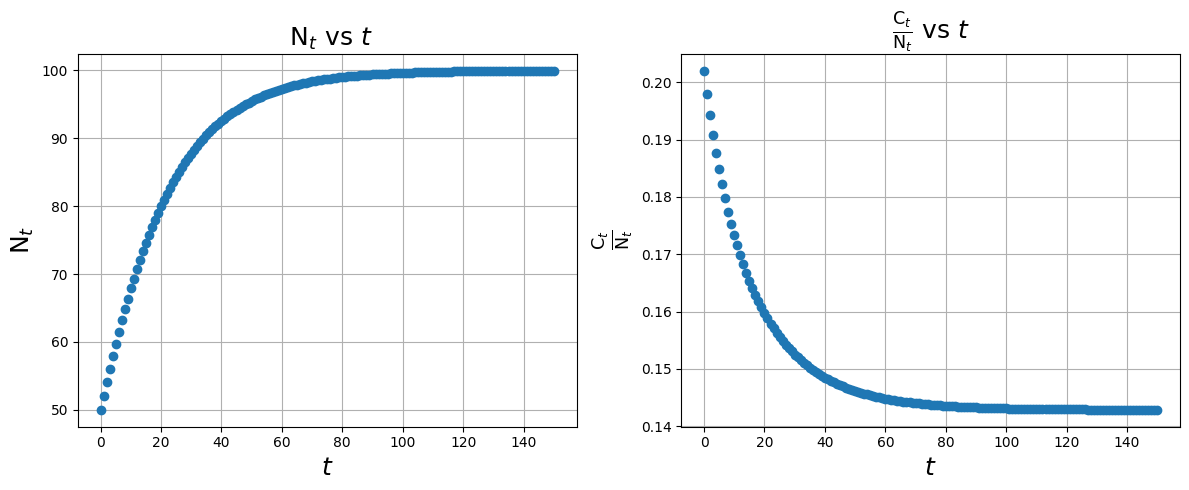

In [277]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))
# Create a scatter plot using a colormap. Here we use the index of each point to assign colors.
# You can also assign colors based on other quantities if desired.
Nt = np.zeros(151)
Ct = np.zeros(151)
Ct_Nt = np.zeros(151)
Nt[0] = 50
Ct[0] = output(Nt[0])
Ct_Nt[0] = Ct[0]/Nt[0]
for k in range(150):
    Nt[k+1] = Nt[k] * (1 + birth_rate(Ct[k], Nt[k]) - death_rate(Ct[k], Nt[k]))
    Ct[k+1] = output(Nt[k+1])
    Ct_Nt[k+1] = Ct[k+1]/Nt[k+1]

axs[0].plot(np.linspace(0,150,151),Nt)
# Add a 45° reference line (y = x)


axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{N}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{N}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),Ct_Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18)
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale

plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('1(c).pdf', format = 'pdf')

In [278]:
def Output(Kt,Nt, z = 8):
    alpha = 0.5 
    return z*Kt**(alpha)*Nt**(1-alpha)
def Kt_1(Kt, Y ,s = 0.25, d = 0.3):
    return s*Y + (1-d)*Kt
def Nt_1(Nt , n = 0.2):   
    return (1+n)*Nt
def Savings(Yt, s = 0.25):
    return Yt*s


In [279]:
Kt = np.zeros(151)
Nt = np.zeros(151)
St = np.zeros(151)
Yt = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
Yt[0] = Output(Kt[0],Nt[0])
St[0] = Savings(Yt[0])
for k in range(150):
    Nt[k+1] = Nt_1(Nt[k])
    Kt[k+1] = Kt_1(Kt[k], Yt[k])
    Yt[k+1] = Output(Kt[k+1], Nt[k+1])
    St[k+1] = Savings(Yt[k+1])
print(f'Nt:{Nt}, St:{St},Yt:{Yt},Kt:{Kt}')

Nt:[1.00000000e+02 1.20000000e+02 1.44000000e+02 1.72800000e+02
 2.07360000e+02 2.48832000e+02 2.98598400e+02 3.58318080e+02
 4.29981696e+02 5.15978035e+02 6.19173642e+02 7.43008371e+02
 8.91610045e+02 1.06993205e+03 1.28391846e+03 1.54070216e+03
 1.84884259e+03 2.21861111e+03 2.66233333e+03 3.19479999e+03
 3.83375999e+03 4.60051199e+03 5.52061439e+03 6.62473727e+03
 7.94968472e+03 9.53962166e+03 1.14475460e+04 1.37370552e+04
 1.64844662e+04 1.97813595e+04 2.37376314e+04 2.84851577e+04
 3.41821892e+04 4.10186270e+04 4.92223524e+04 5.90668229e+04
 7.08801875e+04 8.50562250e+04 1.02067470e+05 1.22480964e+05
 1.46977157e+05 1.76372588e+05 2.11647106e+05 2.53976527e+05
 3.04771832e+05 3.65726199e+05 4.38871439e+05 5.26645726e+05
 6.31974872e+05 7.58369846e+05 9.10043815e+05 1.09205258e+06
 1.31046309e+06 1.57255571e+06 1.88706685e+06 2.26448023e+06
 2.71737627e+06 3.26085153e+06 3.91302183e+06 4.69562620e+06
 5.63475144e+06 6.76170172e+06 8.11404207e+06 9.73685048e+06
 1.16842206e+07 1.402

[10.         11.1037961  12.03094089 12.79898998 13.42869016 13.94093214
 14.35513669 14.68852527 14.95590839 15.16975815 15.34042121 15.47638733
 15.58456592 15.67054547 15.73882482 15.79301244 15.83599447 15.87007428
 15.89708697 15.91849259 15.93545162 15.94888561 15.95952592 15.96795268
 15.97462586 15.97991004 15.98409414 15.98740703 15.99003005 15.9921068
 15.99375101 15.99505276 15.99608335 15.99689927 15.99754523 15.99805662
 15.99846148 15.99878199 15.99903574 15.99923663 15.99939566 15.99952156
 15.99962124 15.99970015 15.99976261 15.99981207 15.99985122 15.99988222
 15.99990676 15.99992618 15.99994156 15.99995374 15.99996337 15.999971
 15.99997704 15.99998183 15.99998561 15.99998861 15.99999098 15.99999286
 15.99999435 15.99999553 15.99999646 15.9999972  15.99999778 15.99999824
 15.99999861 15.9999989  15.99999913 15.99999931 15.99999945 15.99999957
 15.99999966 15.99999973 15.99999979 15.99999983 15.99999987 15.99999989
 15.99999992 15.99999993 15.99999995 15.99999996 15.99

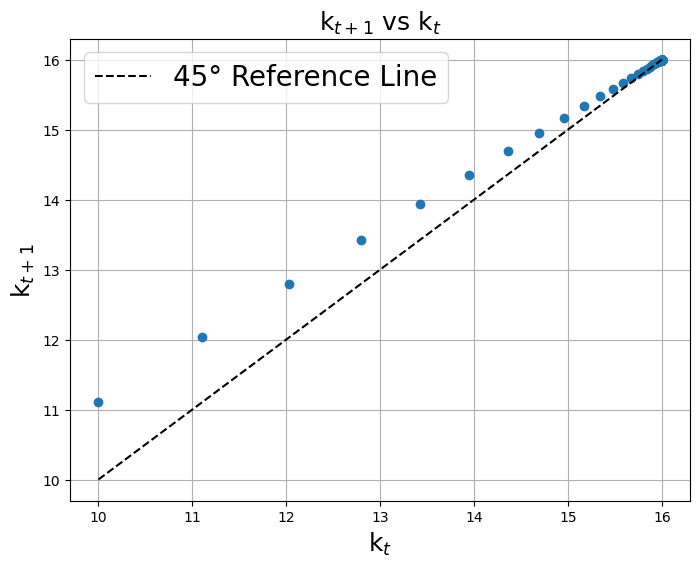

In [280]:
cmap=mpl.colormaps['tab20c']
plt.figure(figsize=(8, 6))

Kt_Nt = Kt/Nt
print(Kt_Nt)
# Create a scatter plot using a colormap. Here we use the index of each point to assign colors.
# You can also assign colors based on other quantities if desired.

plt.plot(Kt_Nt[0:150], Kt_Nt[1:151], 'o')

# Add a 45° reference line (y = x)
x = np.linspace(Kt_Nt[0],Kt_Nt[150],151)
y = x
plt.plot(x,y, 'k--', label='45° Reference Line')

plt.xlabel(r'$\mathrm{k}_t$', fontsize = 18)
plt.ylabel(r'$\mathrm{k}_{t+1}$', fontsize = 18)
plt.title(r'$\mathrm{k}_{t+1}$ vs $\mathrm{k}_{t}$', fontsize = 18)
plt.legend(fontsize = 20)
plt.grid(True)

# Optionally, add a colorbar if you want to visualize the colormap scale
savefig('2(b).pdf', format = 'pdf')

plt.show()

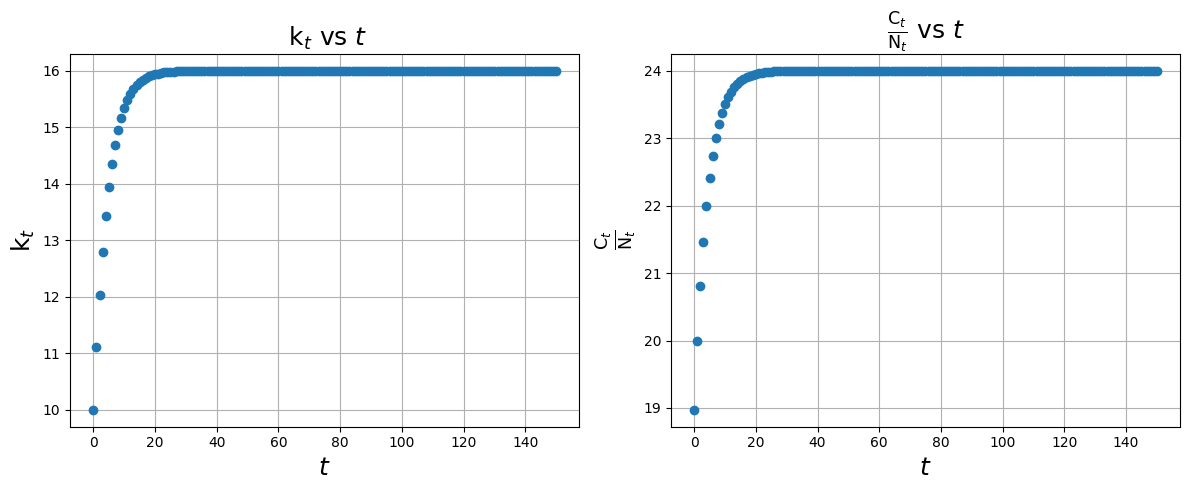

In [281]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].plot(np.linspace(0,150,151),Kt/Nt)
# Add a 45° reference line (y = x)

axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{k}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{k}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Yt-St)/Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18) 
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale

plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('2(c).pdf', format = 'pdf')

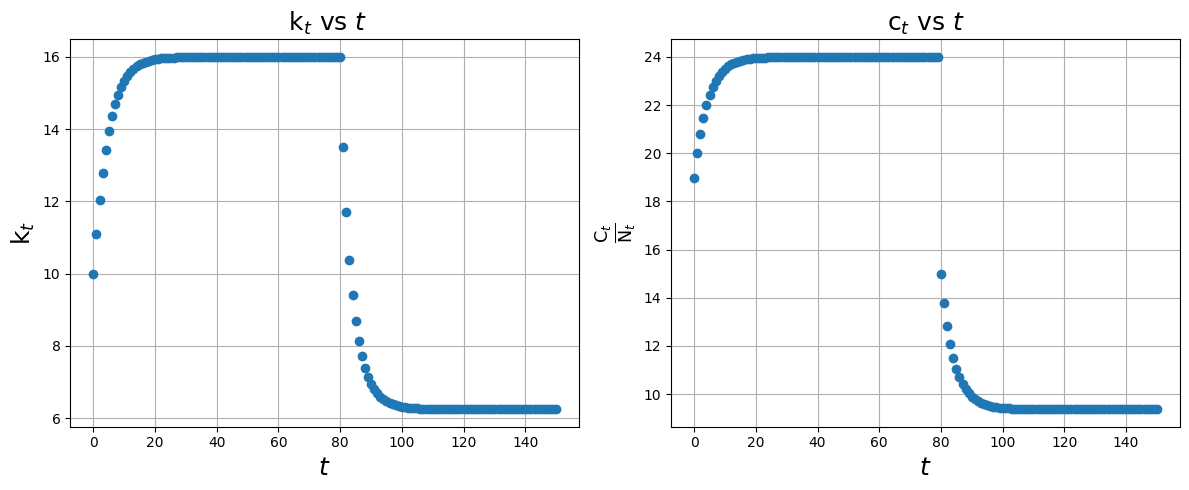

In [282]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))
Kt = np.zeros(151)
Nt = np.zeros(151)
St = np.zeros(151)
Yt = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
Yt[0] = Output(Kt[0],Nt[0])
St[0] = Savings(Yt[0])
for k in range(150):
    if k < 79:
        Nt[k+1] = Nt_1(Nt[k])
        Kt[k+1] = Kt_1(Kt[k], Yt[k])
        Yt[k+1] = Output(Kt[k+1], Nt[k+1])
        St[k+1] = Savings(Yt[k+1])
    else:
        Nt[k+1] = Nt_1(Nt[k])
        Kt[k+1] = Kt_1(Kt[k], Yt[k])
        Yt[k+1] = Output(Kt[k+1], Nt[k+1], z = 5)
        St[k+1] = Savings(Yt[k+1])
axs[0].plot(np.linspace(0,150,151),Kt/Nt)
# Add a 45° reference line (y = x)

axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{k}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{k}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Yt-St)/Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18)
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'${\mathrm{c}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale

plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('2(d).pdf', format = 'pdf')

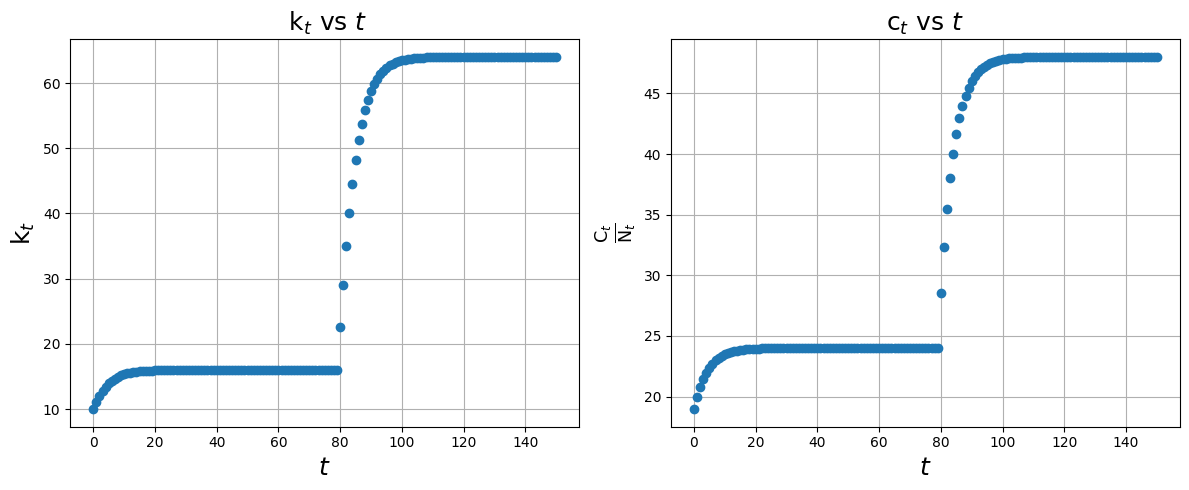

In [283]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))
Kt = np.zeros(151)
Nt = np.zeros(151)
St = np.zeros(151)
Yt = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
Yt[0] = Output(Kt[0],Nt[0])
St[0] = Savings(Yt[0])
for k in range(150):
    if k < 79:
        Nt[k+1] = Nt_1(Nt[k])
        Kt[k+1] = Kt_1(Kt[k], Yt[k])
        Yt[k+1] = Output(Kt[k+1], Nt[k+1])
        St[k+1] = Savings(Yt[k+1])
    else:
        Nt[k+1] = Nt_1(Nt[k])
        Kt[k+1] = Kt_1(Kt[k], Yt[k], s = 0.5)
        Yt[k+1] = Output(Kt[k+1], Nt[k+1])
        St[k+1] = Savings(Yt[k+1])
axs[0].plot(np.linspace(0,150,151),Kt/Nt)
# Add a 45° reference line (y = x)

axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{k}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{k}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Yt-St)/Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18)
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'${\mathrm{c}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale

plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('2(e).pdf', format = 'pdf')

In [284]:
def Output3(Kt,Nt, z = 8):
    alpha = 0.5 
    return z*Kt**(alpha)*Nt**(1-alpha)
def Kt_1(Kt, Y ,s = 0.25, d = 0.3):
    return s*Y + (1-d)*Kt
def Nt_1(Nt, Ct, c = 0.1, t = 2):   
    return Nt + (Ct/(t)-c*Nt)
def Savings(Yt, s = 0.25):
    return Yt*s
def Consumptions(Yt, s = 0.25):
    return Yt*(1-s)


In [285]:
Kt = np.zeros(151)
Nt = np.zeros(151)
St = np.zeros(151)
Yt = np.zeros(151)
Ct = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
Yt[0] = Output3(Kt[0],Nt[0])
St[0] = Savings(Yt[0])
Ct[0] = Consumptions(Yt[0])
print(Ct[0])
for k in range(150):
    Nt[k+1] = Nt_1(Nt[k] , Consumptions(Yt[k]))
    Kt[k+1] = Kt_1(Kt[k],Yt[k])
    Yt[k+1] = Output3(Kt[k+1], Nt[k+1])
    St[k+1] = Savings(Yt[k+1])
    Ct[k+1] = Consumptions(Yt[k+1])
print(f'Nt:{Nt[0:17]}, St:{St[0:17]},Yt:{Yt[0:17]},Kt:{Kt[0:17]}, Ct:{Ct[0:17]}')

1897.3665961010274
Nt:[1.00000000e+02 1.03868330e+03 4.46411996e+03 1.55070668e+04
 5.12388165e+04 1.67262863e+05 5.44387792e+05 1.77051553e+06
 5.75722240e+06 1.87200524e+07 6.08690307e+07 1.97917660e+08
 6.43535376e+08 2.09247478e+09 6.80374488e+09 2.21225816e+10
 7.19322407e+10], St:[6.32455532e+02 2.35287000e+03 7.65957254e+03 2.48549709e+04
 8.07652857e+04 2.62567476e+05 8.53711011e+05 2.77583895e+06
 9.02570149e+06 2.93473224e+07 9.54236886e+07 3.10272987e+08
 1.00886196e+09 3.28034505e+09 1.06661408e+10 3.46812782e+10
 1.12767221e+11],Yt:[2.52982213e+03 9.41147999e+03 3.06382902e+04 9.94198837e+04
 3.23061143e+05 1.05026991e+06 3.41484404e+06 1.11033558e+07
 3.61028059e+07 1.17389289e+08 3.81694754e+08 1.24109195e+09
 4.03544784e+09 1.31213802e+10 4.26645632e+10 1.38725113e+11
 4.51068885e+11],Kt:[1.00000000e+03 1.33245553e+03 3.28558887e+03 9.95948475e+03
 3.18266103e+04 1.03043913e+05 3.34698215e+05 1.08799976e+06
 3.53743879e+06 1.15019086e+07 3.73986584e+07 1.21602749e+08
 3

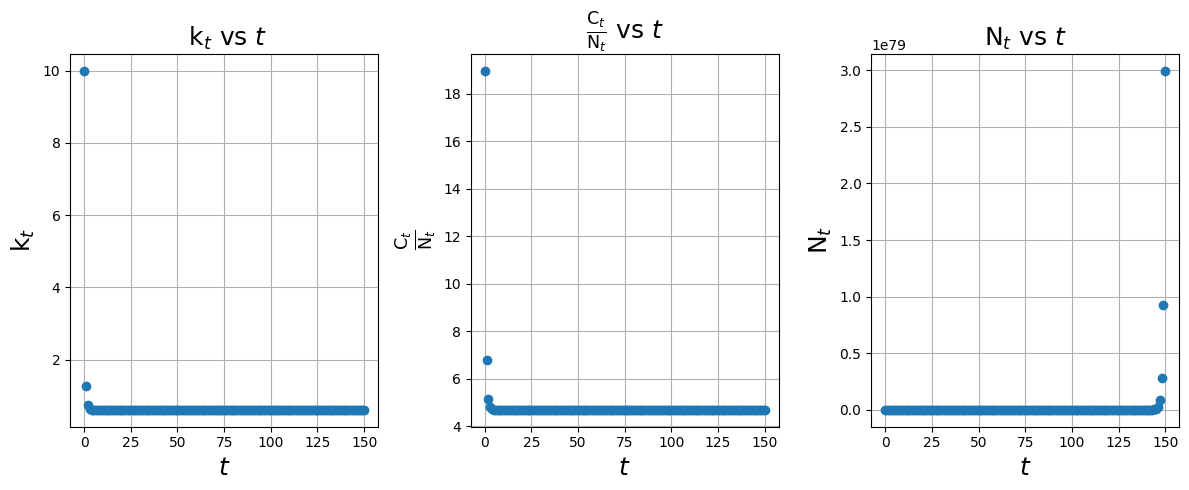

In [286]:
fig, axs = plt.subplots(1,3,figsize=(12, 5))

axs[0].plot(np.linspace(0,150,151),Kt/Nt)
axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{k}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{k}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Yt-St)/Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18) 
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale
axs[2].plot(np.linspace(0,150,151), Nt)
axs[2].set_xlabel(r'$t$', fontsize = 18) 
axs[2].set_ylabel(r'${\mathrm{N}_t}$', fontsize = 18)
axs[2].set_title(r'${\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[2].grid(True)
plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('3(b).pdf', format = 'pdf')

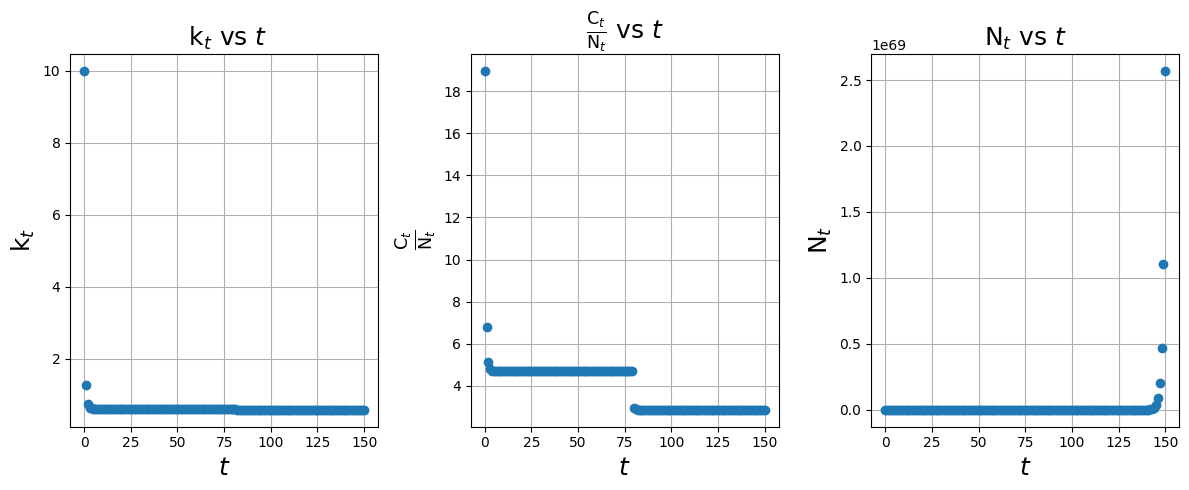

In [287]:
fig, axs = plt.subplots(1,3,figsize=(12, 5))
Kt = np.zeros(151)
Nt = np.zeros(151)
St = np.zeros(151)
Yt = np.zeros(151)
Ct = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
Yt[0] = Output(Kt[0],Nt[0])
St[0] = Savings(Yt[0])
Ct[0] = Consumptions(Yt[0])
for k in range(150):
    if k < 79:
        Nt[k+1] = Nt_1(Nt[k] , Consumptions(Yt[k]))
        Kt[k+1] = Kt_1(Kt[k],Yt[k])
        Yt[k+1] = Output3(Kt[k+1], Nt[k+1])
        St[k+1] = Savings(Yt[k+1])
        Ct[k+1] = Consumptions(Yt[k+1])
    else:
        Nt[k+1] = Nt_1(Nt[k] , Consumptions(Yt[k]))
        Kt[k+1] = Kt_1(Kt[k],Yt[k])
        Yt[k+1] = Output3(Kt[k+1], Nt[k+1], z = 5)
        St[k+1] = Savings(Yt[k+1])
        Ct[k+1] = Consumptions(Yt[k+1])
axs[0].plot(np.linspace(0,150,151),Kt/Nt)
axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{k}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{k}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Yt-St)/Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18) 
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale
axs[2].plot(np.linspace(0,150,151), Nt)
axs[2].set_xlabel(r'$t$', fontsize = 18) 
axs[2].set_ylabel(r'${\mathrm{N}_t}$', fontsize = 18)
axs[2].set_title(r'${\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[2].grid(True)
plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('3(c).pdf', format = 'pdf')

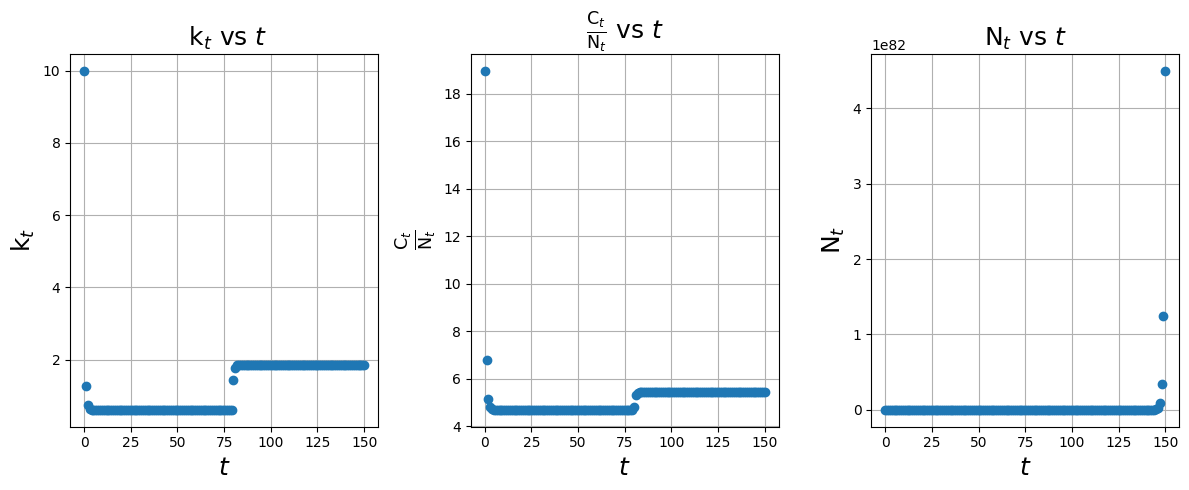

In [288]:
fig, axs = plt.subplots(1,3,figsize=(12, 5))
Kt = np.zeros(151)
Nt = np.zeros(151)
St = np.zeros(151)
Yt = np.zeros(151)
Ct = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
Yt[0] = Output(Kt[0],Nt[0])
St[0] = Savings(Yt[0])
Ct[0] = Consumptions(Yt[0])
for k in range(150):
    if k < 79:
        Nt[k+1] = Nt_1(Nt[k] , Consumptions(Yt[k]))
        Kt[k+1] = Kt_1(Kt[k],Yt[k])
        Yt[k+1] = Output3(Kt[k+1], Nt[k+1])
        St[k+1] = Savings(Yt[k+1])
        Ct[k+1] = Consumptions(Yt[k+1])
    else:
        Nt[k+1] = Nt_1(Nt[k] , Consumptions(Yt[k], s = 0.5))
        Kt[k+1] = Kt_1(Kt[k],Yt[k], s = 0.5)
        Yt[k+1] = Output3(Kt[k+1], Nt[k+1])
        St[k+1] = Savings(Yt[k+1], s = 0.5)
        Ct[k+1] = Consumptions(Yt[k+1], s = 0.5)
axs[0].plot(np.linspace(0,150,151),Kt/Nt)
axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\mathrm{k}_t$', fontsize = 18)
axs[0].set_title(r' $\mathrm{k}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Yt-St)/Nt)
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18) 
axs[1].set_ylabel(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$', fontsize = 18)
axs[1].set_title(r'$\frac{\mathrm{C}_t}{\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale
axs[2].plot(np.linspace(0,150,151), Nt)
axs[2].set_xlabel(r'$t$', fontsize = 18) 
axs[2].set_ylabel(r'${\mathrm{N}_t}$', fontsize = 18)
axs[2].set_title(r'${\mathrm{N}_t}$ vs $t$', fontsize = 18)
axs[2].grid(True)
plt.tight_layout()  # You can adjust pad as needed; higher values increase spacing.
savefig('3(d).pdf', format = 'pdf')

In [289]:
def Y_t(Kt,Nt, zt):
    alpha = 0.5 
    return Kt**(alpha)*(zt*Nt)**(1-alpha)
def Kt_1(Kt, Yt ,s = 0.25, tau = 0.9, d = 0.3):
    return s*(tau)*Yt + (0.7)*Kt
def Nt_1(Nt, n = 0.2):
    return (1.2)*Nt
def zt_1(zt, g = 0.1):
    return (1.1)*zt
def Ct_1(Yt, s = 0.25, tau = 0.9):
    return Yt*(0.75)*(tau)

In [290]:
# Given parameters
alpha = 0.5
s = 0.25
tau = 0.1
d = 0.3
n = 0.2
g = 0.1

# Law of motion for k_tilde:
def update_k_tilde(k_tilde):
    num = (1 - d)*k_tilde + s*(1 - tau)*(k_tilde**alpha)
    den = (1 + n)*(1 + g)
    return num / den

# Iteration until convergence
k_tilde = 1.0   # initial guess
tol = 1e-8
max_iter = 10_000

for i in range(max_iter):
    new_k_tilde = update_k_tilde(k_tilde)
    if abs(new_k_tilde - k_tilde) < tol:
        break
    k_tilde = new_k_tilde

print("Approx. steady-state k_tilde =", k_tilde)

Approx. steady-state k_tilde = 0.13169879316433908


C:\Users\Henry Su\AppData\Local\Temp\ipykernel_28208\3404629807.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 20)


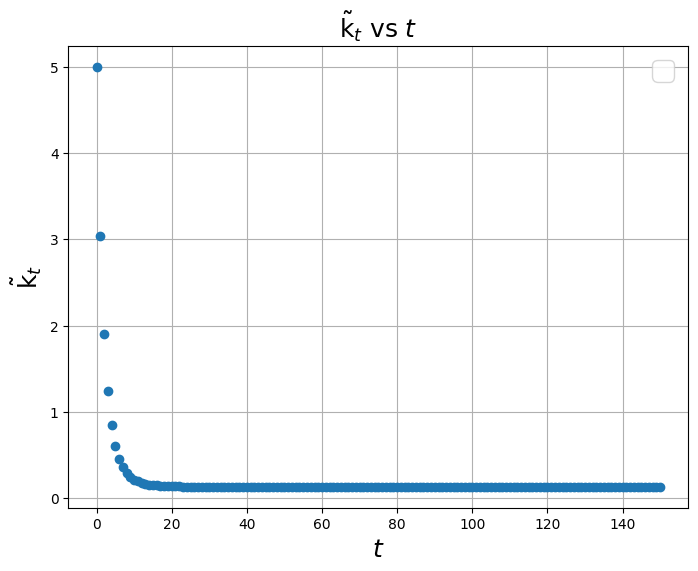

In [291]:
plt.figure(figsize=(8, 6))

Kt = np.zeros(151)
Nt = np.zeros(151)
zt = np.zeros(151)

Yt = np.zeros(151)
Ct = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
zt[0] = 2
Yt[0] = Y_t(Kt[0],Nt[0], zt = zt[0])
for k in range(150):
    Nt[k+1] = Nt_1(Nt[k])
    zt[k+1] = zt_1(zt[k])
    Kt[k+1] = Kt_1(Kt[k],Yt[k])
    Yt[k+1] = Y_t(Kt[k+1], Nt[k+1], zt = zt[k+1])
    Ct[k+1] = Ct_1(Yt[k+1])
plt.plot(np.linspace(0,150,151),Kt/(zt*Nt), 'o')


plt.ylabel(r'$\tilde{\mathrm{k}}_{t}$', fontsize = 18)
plt.xlabel(r'$t$', fontsize = 18)
plt.title(r'$\tilde{\mathrm{k}}_{t}$ vs ${t}$', fontsize = 18)
plt.legend(fontsize = 20)
plt.grid(True)

# Optionally, add a colorbar if you want to visualize the colormap scale
savefig('4(f)(ii).pdf', format = 'pdf')

plt.show()

C:\Users\Henry Su\AppData\Local\Temp\ipykernel_28208\2957960571.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 20)


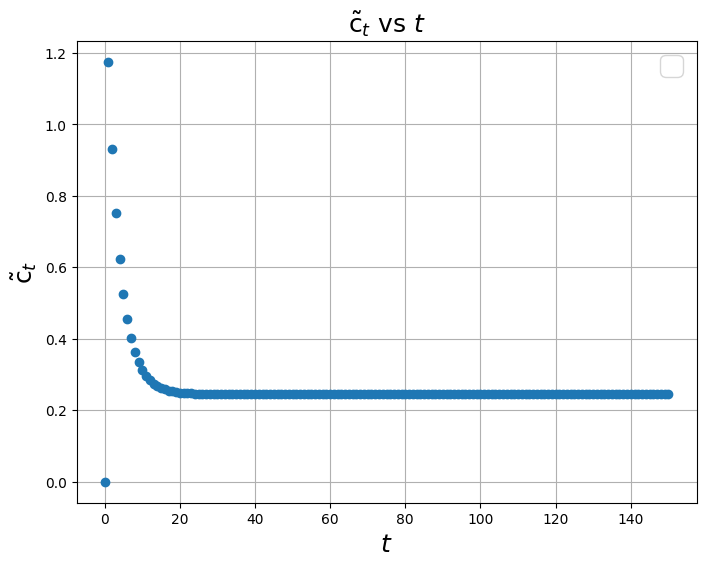

In [292]:
plt.figure(figsize=(8, 6))

Kt = np.zeros(151)
Nt = np.zeros(151)
zt = np.zeros(151)

Yt = np.zeros(151)
Ct = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
zt[0] = 2
Yt[0] = Y_t(Kt[0],Nt[0], zt = zt[0])
for k in range(150):
    Nt[k+1] = Nt_1(Nt[k])
    zt[k+1] = zt_1(zt[k])
    Kt[k+1] = Kt_1(Kt[k],Yt[k])
    Yt[k+1] = Y_t(Kt[k+1], Nt[k+1], zt = zt[k+1])
    Ct[k+1] = Ct_1(Yt[k+1])
plt.plot(np.linspace(0,150,151),Ct/(zt*Nt), 'o')


plt.ylabel(r'$\tilde{\mathrm{c}}_{t}$', fontsize = 18)
plt.xlabel(r'$t$', fontsize = 18)
plt.title(r'$\tilde{\mathrm{c}}_{t}$ vs ${t}$', fontsize = 18)
plt.legend(fontsize = 20)
plt.grid(True)

# Optionally, add a colorbar if you want to visualize the colormap scale
savefig('4(f)(iii).pdf', format = 'pdf')

plt.show()

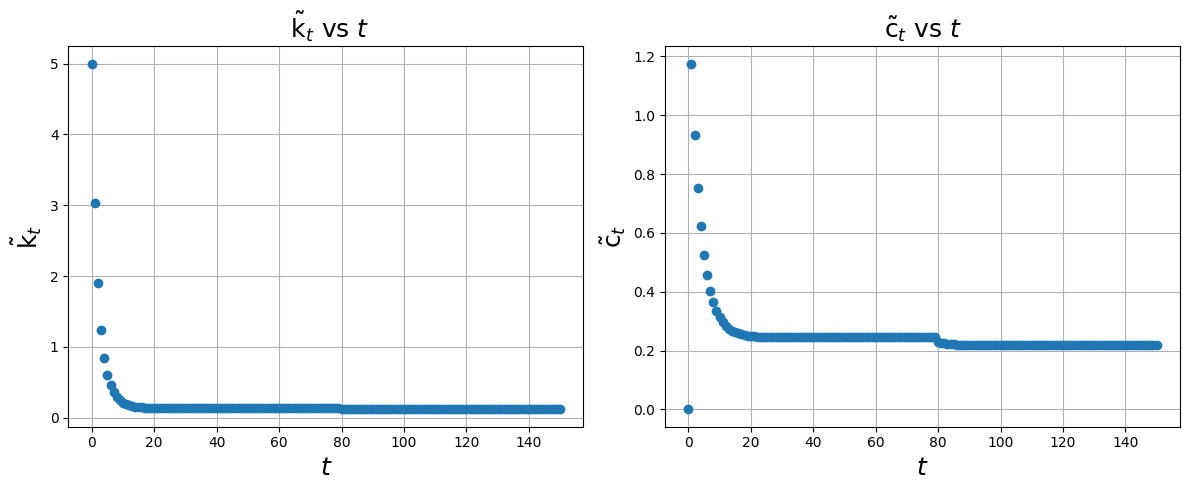

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))
Kt = np.zeros(151)
Nt = np.zeros(151)
zt = np.zeros(151)

Yt = np.zeros(151)
Ct = np.zeros(151)
Kt[0] = 1000
Nt[0] = 100
zt[0] = 2
Yt[0] = Y_t(Kt[0],Nt[0], zt = zt[0])
for k in range(150):
    if k < 79:
        Nt[k+1] = Nt_1(Nt[k])
        zt[k+1] = zt_1(zt[k])
        Kt[k+1] = Kt_1(Kt[k],Yt[k])
        Yt[k+1] = Y_t(Kt[k+1], Nt[k+1], zt = zt[k+1])
        Ct[k+1] = Ct_1(Yt[k+1])
    else:
        Nt[k+1] = Nt_1(Nt[k])
        zt[k+1] = zt_1(zt[k])
        Kt[k+1] = Kt_1(Kt[k],Yt[k] , tau= 0.85)
        Yt[k+1] = Y_t(Kt[k+1], Nt[k+1], zt = zt[k+1])
        Ct[k+1] = Ct_1(Yt[k+1] , tau = 0.85)
axs[0].plot(np.linspace(0,150,151),Kt/(zt*Nt),'o')
# Add a 45° reference line (y = x)
axs[0].set_xlabel(r'$t$', fontsize = 18)
axs[0].set_ylabel(r'$\tilde{\mathrm{k}}_t$', fontsize = 18)
axs[0].set_title(r' $\tilde{\mathrm{k}}_t$ vs $t$', fontsize = 18)
axs[0].grid(True)

axs[1].plot(np.linspace(0,150,151),(Ct)/(zt*Nt), 'o')
# Add a 45° reference line (y = x)

axs[1].set_xlabel(r'$t$', fontsize = 18)
axs[1].set_ylabel(r'$\tilde{\mathrm{c}}_t$', fontsize = 18)
axs[1].set_title(r'$\tilde{\mathrm{c}}_t$ vs $t$', fontsize = 18)
axs[1].grid(True)
# Optionally, add a colorbar if you want to visualize the colormap scale
tight_layout()
savefig('4(g).pdf', format = 'pdf')